In [1]:
import pandas as pd
import numpy as np

url = "https://drive.google.com/uc?export=download&id=1tEvJfPhYg0t5NXUKX66GGPLSk0EMYIF1"

games = pd.read_csv(url)
games = games.drop(["url", "meta_score", "user_score", "platform", "developer", "type", "rating"], axis=1)
games = games.dropna()
games = games[games["description"] != "None"]

games["genre"] = games["genre"].apply(eval)

games

,game_name,description,genre
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ...","[Action Adventure, Fantasy]"
1,Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...,"[Action, Platformer, 3D]"
2,Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy...","[Action, Platformer, 3D]"
3,Metroid Prime,Samus returns in a new mission to unravel the ...,"[Action, Shooter, First-Person, Sci-Fi]"
4,Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....,"[Action, Platformer, 3D]"
...,...,...,...
8826,kill.switch,"In a world on the brink of global conflict, yo...","[Action, Shooter, Third-Person, Modern]"
8827,nail'd,nail’d is all about eschewing boring realism f...,"[Driving, Racing, Arcade, Automobile]"
8828,oOo: Ascension,oOo: Ascension is a lightning-paced test of re...,"[Action, General, Arcade]"
8829,uDraw Studio,"Packaged with the uDraw GameTablet, uDraw Stud...","[Miscellaneous, General]"


In [2]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

counts = to_1D(games["genre"]).value_counts(normalize=True)
print(counts)

Action              0.104578
General             0.083466
Action Adventure    0.040667
Shooter             0.037115
Role-Playing        0.035694
                      ...   
Civilian Plane      0.000068
Bowling             0.000068
Tank                0.000034
Drag                0.000034
Skating             0.000034
Length: 168, dtype: float64


In [3]:
rp1 = ["Action", "Action Adventure", "Adventure", "Open-World", "Sandbox"]
rp2 = ["Driving", "Racing", "Horse Racing", "Demolition Derby", "Stock Car", 
       "Automobile", "Motocross", "Formula One", "Kart", "Motorcycle", "Rally / Offroad", 
       "Street", "Truck", "Drag", "GT / Street", "On-foot"]
rp3 = ["Skating",  "Skiing", "Surf / Wakeboard", "Ski / Snowboard", "Olympic Sports", 
       "Skate / Skateboard", "Snowboarding", "Skateboarding", "Wakeboarding", "Biking", 
       "Surfing", "Individual","Bowling", "Cricket", "Volleyball", "Rugby", "Tennis", 
       "Ice Hockey", "Golf", "Baseball", "Football", "Basketball", "Soccer", "Team", 
       "Traditional", "Sports", "Athletics", "Alternative"]
rp4 = ["Nature", "Fishing", "Hunting", "Snow / Water"]
rp5 = ["Role-Playing", "Action RPG", "Console-style RPG", "PC-style RPG"]
rp6 = ["Shoot-'Em-Up", "Shooter", "Light Gun"]
rp7 = ["Simulation", "Sim", "Virtual", "Virtual Life"]
rp8 = ["Massively Multiplayer", "Massively Multiplayer Online"]
rp9 = ["Military", "Wargame", "WWII", "WWI", "Command"]
rpA = ["Strategy", "Tactics", "Tactical", "Card Battle", "Turn-Based"]
rpB = ["Beat-'Em-Up", "Wrestling", "Boxing", "Boxing / Martial Arts", "Fighting"]
rpC = ["Combat", "Car Combat", "Mech", "Artillery", "Tank", "Defense"]
rpD = ["Space", "Spaceship", "Small Spaceship", "Large Spaceship"]
rpE = ["Vertical", "Scrolling"]
rpF = ["Parlor", "Billiards", "Gambling", "Pinball", "Board / Card Game", "Board Games", 
       "Party / Minigame", "Party"]
rp11 = ["Puzzle", "Logic", "Edutainment", "Trivia / Game Show", "Hidden Object", "Matching"]
rp12 = ["2D", "Platformer"]
rp13 = ["City Building", "Management", "Government", "Tycoon", "Business / Tycoon", "Breeding/Constructing"]
rp14 = ["Marine", "Ship", "Futuristic Sub", "Submarine"]
rp15 = ["Interactive Movie", "Videos", "Visual Novel"]
rp16 = ["Flight", "Civilian Plane", "Modern Jet", "Futuristic Jet", "Helicopter"]
rp17 = ["Miscellaneous", "Other", "Compilation"]
rp18 = ["Rhythm", "Music", "Music Maker", "Dancing"]

gen_filters = {"Action": rp1, "Racing": rp2, "Sports": rp3, "Nature": rp4,
                "Role_Playing": rp5, "Shooter": rp6, "Simulation": rp7, "Mass_Multiplayer": rp8,
                "War": rp9, "Strategy": rpA, "Fighting": rpB, "Combat": rpC, "Space": rpD, 
               "Vertical": rpE, "Party": rpF, 
               "Puzzle": rp11, "Platformer": rp12, "Management": rp13, "Marine": rp14, 
               "Media": rp15, "Flight": rp16, 
               "Miscellaneous": rp17, "Music": rp18}

In [4]:
for key in gen_filters.keys():
    for i, row in games.iterrows():
        new_list = []
        for x in row["genre"]:
            if x in gen_filters[key]:
                x = key
            if x not in new_list:
                new_list.append(x)
        games.at[i, "genre"] = new_list

counts = to_1D(games["genre"]).value_counts(normalize=True)
counts

Action                0.206384
General               0.105984
Shooter               0.047128
Strategy              0.046999
Role_Playing          0.045324
Miscellaneous         0.042918
Platformer            0.039567
Arcade                0.038235
Simulation            0.034412
First-Person          0.032478
3D                    0.030889
Sports                0.030116
Racing                0.024617
Sci-Fi                0.024359
Fighting              0.023414
Fantasy               0.022211
Modern                0.019676
Third-Person          0.018215
Puzzle                0.017356
Real-Time             0.015466
Historic              0.010955
Combat                0.010611
Survival              0.008420
Party                 0.007991
Music                 0.007905
Japanese-Style        0.007862
Point-and-Click       0.007647
Management            0.007260
Horror                0.005972
Western-Style         0.005069
Linear                0.004812
Vertical              0.004683
War     

In [5]:
labels = counts.index
for label in labels:
    for i,row in games.iterrows():
        if label in row["genre"]:
            games.at[i, label] = 1
        else:
            games.at[i, label] = 0

games.head()

,game_name,description,genre,Action,General,Shooter,Strategy,Role_Playing,Miscellaneous,Platformer,...,Rail,Nature,Stacking,MOBA,Application,Marine,Exercise / Fitness,Pet,Text,Train
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ...","[Action, Fantasy]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...,"[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy...","[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Metroid Prime,Samus returns in a new mission to unravel the ...,"[Action, Shooter, First-Person, Sci-Fi]",1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....,"[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Analysis

In [6]:
data = games.drop("game_name", axis=1)
data = data.drop("description", axis=1)
data = data.drop("genre", axis=1)
data = pd.DataFrame(np.array(data), columns=data.columns, index=games["game_name"])
data.head()

,Action,General,Shooter,Strategy,Role_Playing,Miscellaneous,Platformer,Arcade,Simulation,First-Person,...,Rail,Nature,Stacking,MOBA,Application,Marine,Exercise / Fitness,Pet,Text,Train
game_name,,,,,,,,,,,,,,,,,,,,,
The Legend of Zelda: Ocarina of Time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Mario Galaxy,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Mario Galaxy 2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Metroid Prime,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Mario Odyssey,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


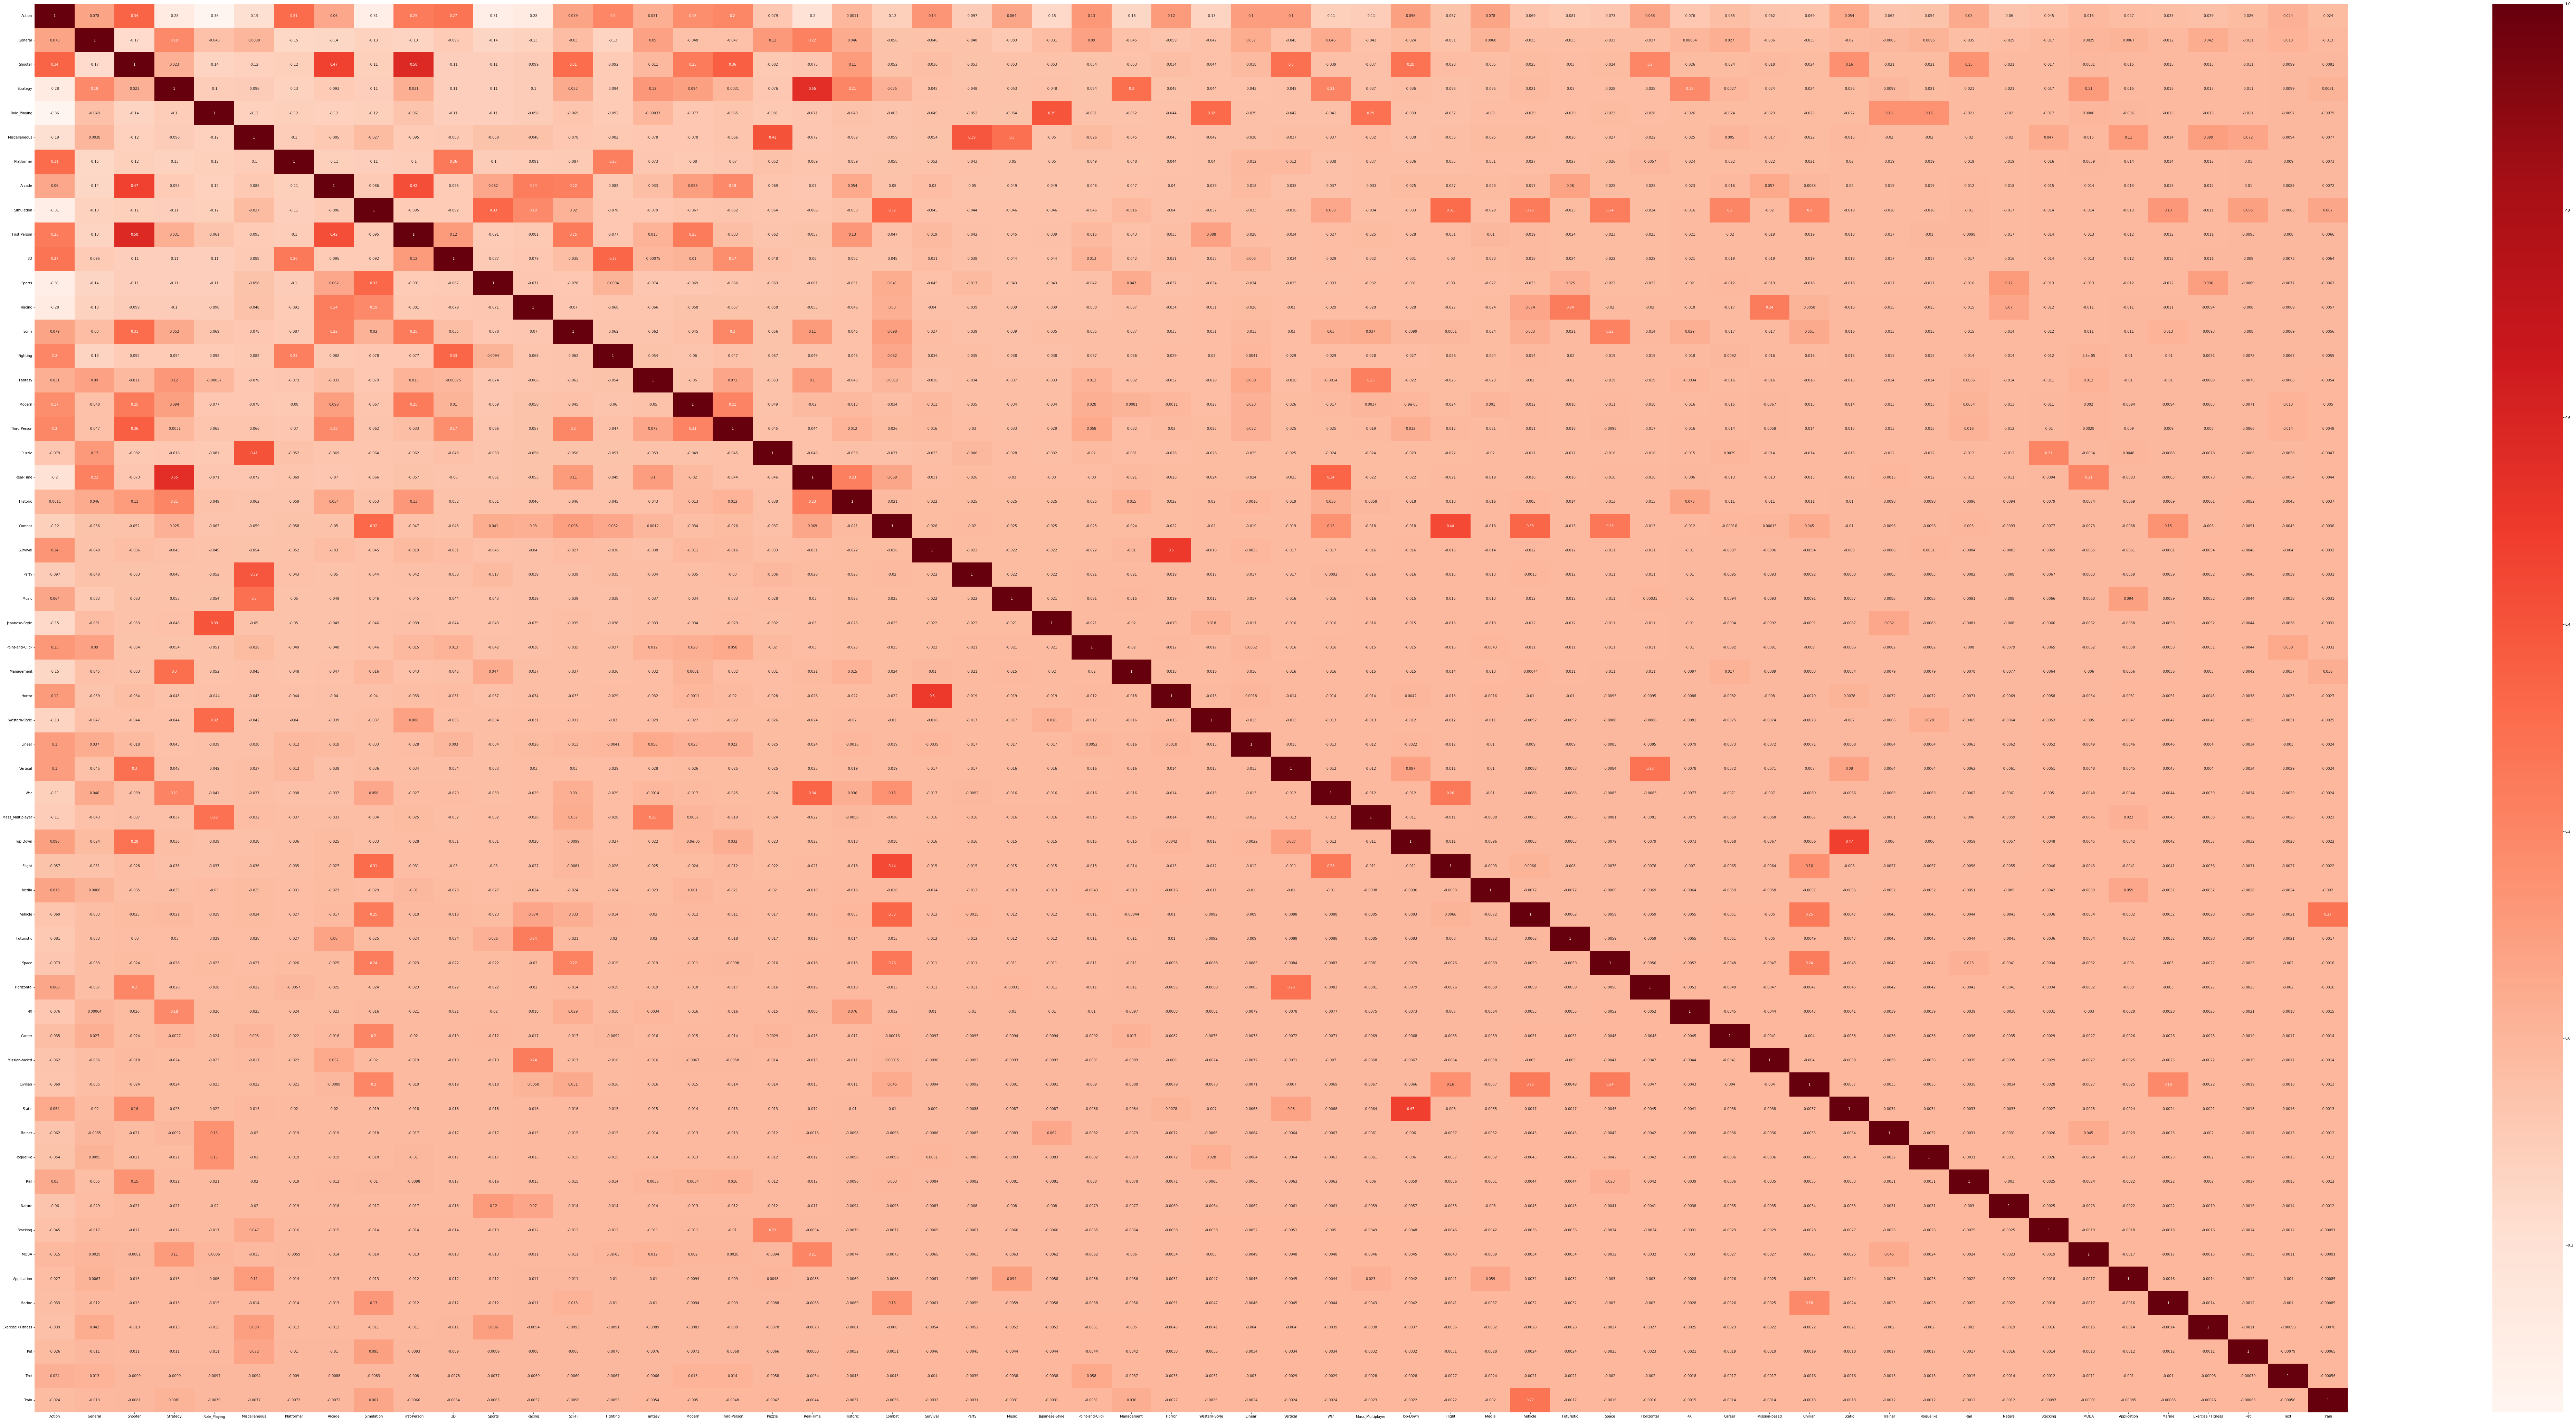

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(150,75))
cor = data.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('corr.png')

In [8]:
cor = data.corr()
cor_target = abs(cor["Space"])
cor_target[cor_target>0.2]

Simulation    0.236419
Sci-Fi        0.216670
Combat        0.264625
Space         1.000000
Civilian      0.241483
Name: Space, dtype: float64

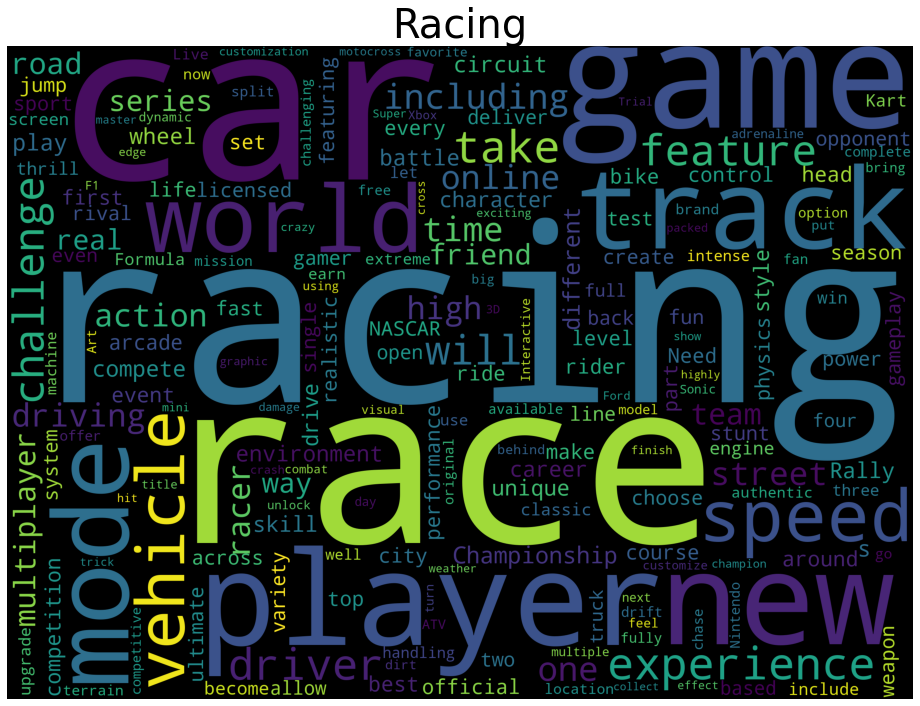

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(20,12))
# genre
subset = games[games["Racing"]==1]
text = subset.description.values
cloud_genre = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Racing",fontsize=40)
plt.imshow(cloud_genre)
plt.savefig("racing.png")
# Same code can be used to generate wordclouds of other categories

## Preprocessing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
games['tokens'] = games['description'].str.lower()
games['tokens'] = games['tokens'].apply(cleanHtml)
games['tokens'] = games['tokens'].apply(cleanPunc)
games['tokens'] = games['tokens'].apply(keepAlpha)

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven',
                   'eight','nine','ten','may','also','across','among','beside',
                   'however','yet','within', 'game', 'player'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
games['tokens'] = games['tokens'].apply(removeStopWords)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
games['tokens'] = games['tokens'].apply(stemming)

games.head()

,game_name,description,genre,Action,General,Shooter,Strategy,Role_Playing,Miscellaneous,Platformer,...,Nature,Stacking,MOBA,Application,Marine,Exercise / Fitness,Pet,Text,Train,tokens
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ...","[Action, Fantasy]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,young boy link trick ganondorf king gerudo thi...
1,Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...,"[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,metacrit wii year ultim nintendo hero take ult...
2,Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy...","[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,super mario galaxi sequel galaxi hop origin in...
3,Metroid Prime,Samus returns in a new mission to unravel the ...,"[Action, Shooter, First-Person, Sci-Fi]",1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,samus return new mission unravel mysteri behin...
4,Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....,"[Action, Platformer, 3D]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,new evolut mario sandbox style gameplay mario ...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False, analyzer='word', ngram_range=(1, 2), max_df=0.5, min_df=0.0005, max_features=None)

games_vec = count.fit_transform(games["tokens"])
games_flame = pd.DataFrame(games_vec.toarray(), columns=count.get_feature_names_out())
del games_vec

games_flame.head()

,abandon,abbey,abduct,abe,abil,abil allow,abil attack,abil battl,abil captur,abil chang,...,zeus,zip,zombi,zombi apocalyps,zombi experi,zone,zoo,zoo tycoon,zookeep,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


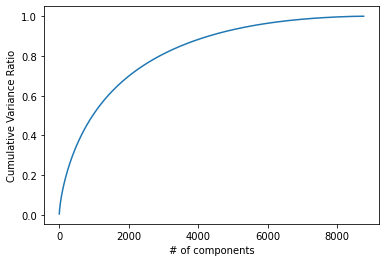

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(games_flame)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2000)
games_frame = pca.fit_transform(games_flame)

games_frame = pd.DataFrame(data = games_frame)

games_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.074160,0.017753,-0.017648,-0.006046,0.028664,-0.007823,-0.037332,-0.056150,0.000995,0.039088,...,-0.001780,0.018472,0.010069,0.002569,0.007832,-0.004481,0.032215,-0.003938,0.003437,-0.010156
1,0.042720,-0.047930,-0.057017,-0.032162,0.030807,0.041416,-0.052875,-0.030223,-0.193350,0.072772,...,0.006001,0.012724,0.010133,0.000607,0.013818,-0.003103,0.002328,-0.002664,-0.007001,-0.007121
2,0.058599,-0.044686,-0.054317,0.027935,0.030509,-0.024166,0.000200,0.022793,-0.124706,0.071484,...,0.006755,0.004325,-0.007588,-0.018485,0.009008,0.016824,-0.017386,-0.010855,0.010523,0.002224
3,-0.054650,-0.024928,-0.009830,0.012740,0.105838,0.014646,-0.073191,0.067199,-0.035570,0.011928,...,-0.000196,0.003766,-0.007237,0.013229,0.006065,-0.003217,0.000220,-0.012914,-0.002780,-0.007159
4,0.004322,-0.002777,-0.063701,0.069830,0.007085,-0.033927,0.001961,-0.006714,-0.073553,0.047710,...,0.000032,-0.013491,-0.010365,0.002269,-0.005774,0.014421,-0.006051,0.000864,0.023390,0.002963


In [14]:
games_att = games.drop(["game_name", "description", "genre", "tokens"], axis=1)
games_att.head()

,Action,General,Shooter,Strategy,Role_Playing,Miscellaneous,Platformer,Arcade,Simulation,First-Person,...,Rail,Nature,Stacking,MOBA,Application,Marine,Exercise / Fitness,Pet,Text,Train
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(games_frame, games_att, test_size=0.20, random_state=27)
print(games_frame.shape, games_att.shape)

(8762, 2000) (8762, 58)


## Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def get_model(optimizer='adam'):
	model = Sequential()
	model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
	model.add(Dense(y_train.shape[1], activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

model = get_model('RMSprop')
model.fit(X_train, y_train, verbose=0, epochs=10, batch_size=10)
yhat = model.predict(X_test)
yhat = yhat.round()
print("Accuracy:", accuracy_score(y_test, yhat))

2022-05-10 02:22:24.055000: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-10 02:22:24.409542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Accuracy: 0.17113519680547631


In [17]:
print("Recall:", recall_score(y_test, yhat, pos_label='positive', average='micro'))

Recall: 0.43675972927241963


In [18]:
print("Precision:", precision_score(y_test, yhat, pos_label='positive', average='micro'))

Precision: 0.7827899924184989


In [19]:
print("F1 Score:", f1_score(y_test, yhat, pos_label='positive', average='micro'))

F1 Score: 0.5606842248167255


In [20]:
predict = model.predict(games_frame)
predict = predict.round()
games_claim = pd.DataFrame()

for i,row in games_frame.iterrows():
    genres_list = []
    for x in range(0, 58):
        if predict[i][x] == 1:
            genres_list.append(labels[x])
    #games_frame.at[i, "predict"] = genres_list
    games_claim.at[i, "predict"] = ', '.join(genres_list)

games_claim

,predict
0,"Action, General"
1,Action
2,"Action, Platformer"
3,"Action, Shooter, First-Person"
4,Action
...,...
8757,"Action, Shooter"
8758,"Arcade, Racing"
8759,Action
8760,Miscellaneous


In [21]:
games_claim['actual'] = games['genre']
games_claim['game'] = games['game_name']
games_claim['description'] = games['description']
games_claim.to_csv("genre_pred.csv")
games_claim

,predict,actual,game,description
0,"Action, General","[Action, Fantasy]",The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ..."
1,Action,"[Action, Platformer, 3D]",Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...
2,"Action, Platformer","[Action, Platformer, 3D]",Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy..."
3,"Action, Shooter, First-Person","[Action, Shooter, First-Person, Sci-Fi]",Metroid Prime,Samus returns in a new mission to unravel the ...
4,Action,"[Action, Platformer, 3D]",Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....
...,...,...,...,...
8757,"Action, Shooter","[Strategy, Real-Time, Historic, General]",XIII Century: Death or Glory,XIII Century is a real-time strategy game driv...
8758,"Arcade, Racing","[Miscellaneous, Music]",Xbox Music Mixer,Xbox Music Mixer lets you go freestyle with yo...
8759,Action,[Role_Playing],Xenoblade Chronicles 3D,Join the battle for Bionis to repel the invasi...
8760,Miscellaneous,[Role_Playing],Xenoblade Chronicles: Definitive Edition,Join the fight between man and machine in the ...


## Naive Bayesian

In [22]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

classifier = BinaryRelevance(GaussianNB())
classifier.fit(np.array(X_train), y_train)

predictions = classifier.predict(np.array(X_test))
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.04392470051340559


In [23]:
print("Recall:", recall_score(y_test, predictions, pos_label='positive', average='micro'))

Recall: 0.5131133671742809


In [24]:
print("Precision:",precision_score(y_test, predictions, pos_label='positive', average='micro'))

Precision: 0.3485632183908046


In [25]:
print("F1 Score:", f1_score(y_test, predictions, pos_label='positive', average='micro'))

F1 Score: 0.41512662559890484


In [26]:
predict = classifier.predict(games_frame)
predict = predict.toarray()
games_shame = pd.DataFrame()

for i,row in games_frame.iterrows():
    genres_list = []
    for x in range(0, 58):
        if predict[i][x] == 1:
            genres_list.append(labels[x])
    #games_frame.at[i, "predict"] = genres_list
    games_shame.at[i, "predict"] = ', '.join(genres_list)

games_shame

,predict
0,"Action, General, Fantasy"
1,"Role_Playing, Miscellaneous, Simulation, 3D, S..."
2,"Miscellaneous, Platformer, 3D"
3,"Action, Shooter, First-Person, Sci-Fi"
4,"Role_Playing, Miscellaneous, Platformer, Simul..."
...,...
8757,"Action, General, Shooter, First-Person, Modern..."
8758,"Action, Arcade, Racing"
8759,"Action, General, Shooter, Arcade, First-Person..."
8760,"Action, General, Strategy"


In [27]:
games_shame['actual'] = games['genre']
games_shame['game'] = games['game_name']
games_shame['description'] = games['description']
games_shame.to_csv("genre_predictions.csv")
games_shame

,predict,actual,game,description
0,"Action, General, Fantasy","[Action, Fantasy]",The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ..."
1,"Role_Playing, Miscellaneous, Simulation, 3D, S...","[Action, Platformer, 3D]",Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...
2,"Miscellaneous, Platformer, 3D","[Action, Platformer, 3D]",Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy..."
3,"Action, Shooter, First-Person, Sci-Fi","[Action, Shooter, First-Person, Sci-Fi]",Metroid Prime,Samus returns in a new mission to unravel the ...
4,"Role_Playing, Miscellaneous, Platformer, Simul...","[Action, Platformer, 3D]",Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....
...,...,...,...,...
8757,"Action, General, Shooter, First-Person, Modern...","[Strategy, Real-Time, Historic, General]",XIII Century: Death or Glory,XIII Century is a real-time strategy game driv...
8758,"Action, Arcade, Racing","[Miscellaneous, Music]",Xbox Music Mixer,Xbox Music Mixer lets you go freestyle with yo...
8759,"Action, General, Shooter, Arcade, First-Person...",[Role_Playing],Xenoblade Chronicles 3D,Join the battle for Bionis to repel the invasi...
8760,"Action, General, Strategy",[Role_Playing],Xenoblade Chronicles: Definitive Edition,Join the fight between man and machine in the ...
